## Mount and import from Google Cloud platform (GCP)

In [ ]:
#  uploaded=files.upload()
#   for fn in uploaded.keys():
    # predicting images
#    path='./' + fn
#    img=image.load_img(path, target_size=(256, 256))
#    x=image.img_to_array(img)/255
#    x=np.expand_dims(x, axis=0)
#    images = np.vstack([x])

In [ ]:
ls

sample_data/


In [ ]:
import sys
if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()


In [ ]:
BUCKET_NAME = 'bucket_name'

GCS_BUCKET = f'gs://{BUCKET_NAME}'
!gsutil mb -p $GCP_PROJECT_ID $GCS_BUCKET

Creating gs://fish_size_project_data/...
ServiceException: 409 A Cloud Storage bucket named 'fish_size_project_data' already exists. Try another name. Bucket names must be globally unique across all Google Cloud projects, including those outside of your organization.


In [ ]:
# !pip install gcloud

In [ ]:
# install gcsfuse on colab.
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  68567      0 --:--:-- --:--:-- --:--:-- 68567
OK
50 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 50 not upgraded.
Need to get 11.5 MB of archives.
After this operation, 27.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.41.1_amd64.deb ...
Unpacking gcsfuse (0.41.1) ...
Setting up gcsfuse (0.41.1) ...


In [ ]:
!mkdir deeper_data
!gcsfuse --implicit-dirs fish_size_project_data deeper_data


2022/05/07 14:15:18.711242 Start gcsfuse/0.41.1 (Go version go1.17.6) for app "" using mount point: /content/deeper_data
2022/05/07 14:15:18.727799 Opening GCS connection...
2022/05/07 14:15:19.068510 Mounting file system "fish_size_project_data"...
2022/05/07 14:15:19.101398 File system has been successfully mounted.


## Prepare the Google Colab environment

#### Install the latest version of Albumentations

Google Colab has an outdated version of Albumentations so we will install the latest stable version from PyPi.

In [1]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

     |████████████████████████████████| 113 kB 9.9 MB/s 
     |████████████████████████████████| 48.3 MB 2.1 MB/s 
albumentations==1.2.0 is successfully installed


## Run the example

**Note**: there is also an alternative way to apply the same augmentation to multiple inputs such as images, masks, etc.

`ReplayCompose` is a tool that could record augmentation parameters applied to one set of inputs (e.g., an image and an associated mask) and then use the recorded values to augment another set of inputs in the same way.

You can read more about `ReplayCompose` [here](https://albumentations.ai/docs/examples/replay/).

### Import the required libraries

In [2]:
!pip install "opencv-python-headless<4.3"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.6 MB 62.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [3]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

### Define a function to visualize an image

In [4]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

## Download and mount the dataset from Github

In [5]:
import os
git_folder = "fishsizeproject/ML-framework-for-image-processing/step3_pre-annotations/"
if os.path.exists(git_folder) == False:
   !git clone https://github.com/fishsizeproject/ML-framework-for-image-processing.git

path_to_images = git_folder 

Cloning into 'ML-framework-for-image-processing'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 52 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [9]:
cd ./ML-framework-for-image-processing/step3_pre-annotations/

/content/ML-framework-for-image-processing/step3_pre-annotations


In [10]:
ls

brian-yurasits-891v7kZMSMg-unsplash.jpeg  object_detection_pre_annotation.ipynb
geoffrey-smith-YXmpFbSF6Dw-unsplash.jpeg  README.md


In [14]:
image1 = 'brian-yurasits-891v7kZMSMg-unsplash.jpeg'
image2 = 'geoffrey-smith-YXmpFbSF6Dw-unsplash.jpeg'

### Load images from the disk

In [15]:
image = cv2.imread(image1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread(image2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

### Show original images

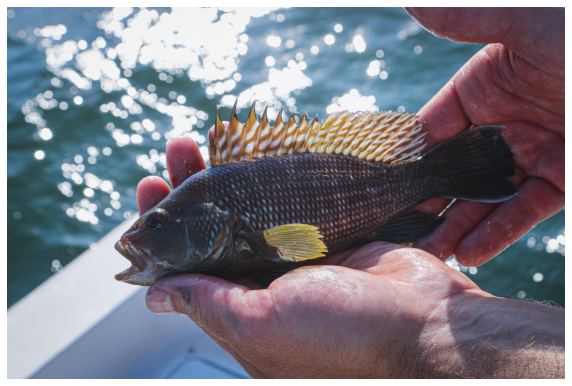

In [16]:
visualize(image)

### Define an augmentation pipeline 

The pipeline expects three images as inputs named `image`, `image0`, and `image1`. Then the pipeline will augment those three images in the same way. So it will apply the same set of transformations with the same parameters.

In [17]:
transform = A.Compose([A.VerticalFlip(p=1),])

transformed = transform(image=image)

transformed_image = transformed["image"]

In [18]:
type(transformed_image)

numpy.ndarray

In [19]:
import cv2
import numpy as np

# cv2.imwrite("image_transformed.jpg", transformed_image)

cv2.imwrite("image_transformed.jpg", cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

True

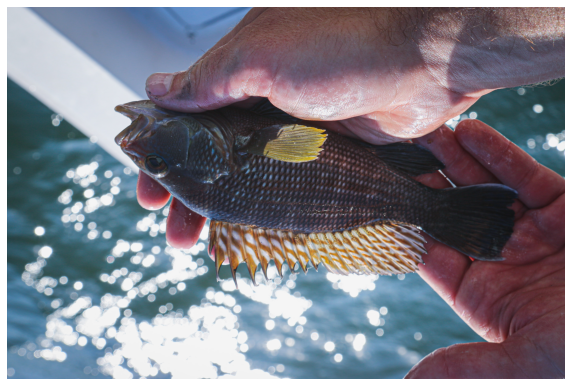

In [20]:
visualize(transformed_image)

## Apply to several images and save

In [ ]:
import os
import csv
import cv2
import numpy as np

import tensorflow as tf

def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

### Vertical Flip

In [ ]:
transform = A.Compose([A.VerticalFlip(p=1),])


In [ ]:

# search for files in 'images' dir
files_dir = os.getcwd() + '/deeper_data/annotated_images_pilot_by_spp/Sander lucioperca'
files = os.listdir(files_dir)

# loop over files, print prediction if it is an image
for f in files:
  if f.lower().endswith(('.jpg')):
    images_path = files_dir + '/' + f
    
  # load and transform images
    image = load_img(images_path)
    transformed = transform(image=image)
    transformed_image = transformed["image"]

  # save transformed images
    # cv2.imwrite("image_transformed.jpg", cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite("./Sander_lucioperca_vertical-flip/vertical-flip_" + str(f), cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

      

In [ ]:
ls

deeper_data/                               Perca_fluviatilis_vertical-flip/
Micropterus_salmoides_horizontal-flip/     Perca_fluviatilis_vertical-flip.zip
Micropterus_salmoides_horizontal-flip.zip  sample_data/
Perca_fluviatilis_horizontal-flip/         Sander_lucioperca_vertical-flip/
Perca_fluviatilis_horizontal-flip.zip


In [ ]:
# create a zip file

!zip -r /content/Sander_lucioperca_vertical-flip.zip /content/Sander_lucioperca_vertical-flip


In [ ]:

# downlod the zip file

from google.colab import files
files.download("/content/Perca_fluviatilis_vertical-flip.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### HorizontalFlip

In [ ]:
transform = A.Compose([A.HorizontalFlip(p=1),])

In [ ]:
# search for files in 'images' dir
files_dir = os.getcwd() + '/deeper_data/annotated_images_pilot_by_spp/Sander lucioperca'
files = os.listdir(files_dir)

# loop over files, print prediction if it is an image
for f in files:
  if f.lower().endswith(('.jpg')):
    images_path = files_dir + '/' + f
    
  # load and transform images
    image = load_img(images_path)
    transformed = transform(image=image)
    transformed_image = transformed["image"]

  # save transformed images
    # cv2.imwrite("image_transformed.jpg", cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite("./Sander_lucioperca_horizontal-flip/horizontal-flip_" + str(f), cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

In [ ]:
# create a zip file

!zip -r /content/Sander_lucioperca_horizontal-flip.zip /content/Sander_lucioperca_horizontal-flip

In [ ]:
# downlod the zip file

from google.colab import files
files.download("/content/Perca_fluviatilis_horizontal-flip.zip")

### Blur

In [ ]:
transform = A.Compose([A.Blur(blur_limit=7, always_apply=False, p=1),])

In [ ]:
# search for files in 'images' dir
files_dir = os.getcwd() + '/deeper_data/annotated_images_pilot_by_spp/Abramis brama'
files = os.listdir(files_dir)

# loop over files, print prediction if it is an image
for f in files:
  if f.lower().endswith(('.jpg')):
    images_path = files_dir + '/' + f
    
  # load and transform images
    image = load_img(images_path)
    transformed = transform(image=image)
    transformed_image = transformed["image"]

  # save transformed images
    # cv2.imwrite("image_transformed.jpg", cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite("./Abramis_brama_blur/blur_" + str(f), cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

In [ ]:
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1),
